# Capstone: Exploratory Data Analysis (EDA)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import project utils
import sys
sys.path.append('../src')

# import constants
import graph_utils


## The Data: San Francisco Police Department Incident Reports

## Understanding the data

Our main objective during the EDA is to understand and prepare the data to answer our Capstone question:

> Can we predict the likelihood of a crime occuring in a specific area at a specific time?

Please reference the [README.md](README.md) for an overview.

Let's dive right in!

## Read the data

The dataset is available as two CSV files with historical data from 2003-2018 and 2018-Present:

* [San Franciso Police Department Incident Reports: Historical 2003 to May 2018](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry/about_data)
* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)

The current data is updated nightly and it takes a few minutes to read and convert the data to a time-series format. So, I've created a set of utilities to optimize data ingestion in the `data_utils.py`.

In [8]:
import data_utils

# Also load the config globals
from data_utils import Config

I periodically refresh the dataset from the [excellent DataSF site](https://www.sf.gov/departments/city-administrator/datasf) to the project `data` directoty, and generate a _clean_ input file transformed as a time-series. I will typically do this a couple of times a week, and save the output as a static comment below so I know what happened.

**Capstone Project 20.1: Initial Report and Exploratory Data Analysis (EDA)**: I'm limiting the report to only the current data for now:

* [Police Department Incident Reports: 2018 to Present](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)


In [10]:
# Convert the raw SFPD data into a cleansed data file - only to be used when refreshing from new data

current_raw_file = Config.CURR_RAW_FILE
current_clean_file = Config.CURR_CLEAN_FILE

# Uncomment to regenerate the clean data file from raw data - normally just read the clean data as it's MUCH FASTER
# data_utils.generate_clean_csv(current_raw_file, current_clean_file, debug=True)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 10/03/24 15:35:42

Reading file: ../data/Police_Department_Incident_Reports__2018_to_Present_20241003.csv ... Done: 894,585 rows, 35 columns
... Formatting column names ... Done
... Creating timeseries columns: datetime ... 
...... Number of rows where the datetime conversion failed: 0
...... Timespan: 2018-01-01 00:00:00 - 2024-10-02 21:45:00
... Done
... Setting index to datetime ... Done

Current Time: 10/03/24 15:40:44

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894585 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   incident_datetime                                     894585 non-null  object 
 1   incident_date                                         894585 non-null  object 
 2   incident_time                                         894585 non-null  object 
 3   incident_year                                         894585 non-null  int64  
 4   incident_day_of_week                                  894585 non-null  object 
 5   report_datetime                                       894585 non-null  object 
 6   row_id                                                894585 non-null  int64  
 7   incident_id                                           894585 non-null  int64  
 8   incident_number                                       894585 non-null  int64  
 9   cad_number                                            695166 non-null  float64
 10  report_type_code                                      894585 non-null  object 
 11  report_type_description                               894585 non-null  object 
 12  filed_online                                          176471 non-null  object 
 13  incident_code                                         894585 non-null  int64  
 14  incident_category                                     893683 non-null  object 
 15  incident_subcategory                                  893683 non-null  object 
 16  incident_description                                  894585 non-null  object 
 17  resolution                                            894585 non-null  object 
 18  intersection                                          845403 non-null  object 
 19  cnn                                                   845403 non-null  float64
 20  police_district                                       894585 non-null  object 
 21  analysis_neighborhood                                 845233 non-null  object 
 22  supervisor_district                                   844940 non-null  float64
 23  supervisor_district_2012                              845260 non-null  float64
 24  latitude                                              845403 non-null  float64
 25  longitude                                             845403 non-null  float64
 26  point                                                 845403 non-null  object 
 27  neighborhoods                                         828688 non-null  float64
 28  esncag_-_boundary_file                                9512 non-null    float64
 29  central_market/tenderloin_boundary_polygon_-_updated  118263 non-null  float64
 30  civic_center_harm_reduction_project_boundary          115874 non-null  float64
 31  hsoc_zones_as_of_2018-06-05                           186873 non-null  float64
 32  invest_in_neighborhoods_(iin)_areas                   0 non-null       float64
 33  current_supervisor_districts                          845260 non-null  float64
 34  current_police_districts                              844494 non-null  float64
dtypes: float64(14), int64(5), object(16)
memory usage: 245.7+ MB
... Writing file: ../data/incidents_clean.csv (894585, 35) ... Done
Done

End Time: 10/03/24 15:41:22
```

As you can see, there are almost a million samples since 2018!

So, I then generate a few randomly sampled datasets of known percentages, to speed up the data exploration. Again only done when refreshing the dataset. Since we'll be working across multiple randomly selected datafiles, I set a global random_state value from hereon remove any randomization artifacts from one run to the next:

In [13]:
# Consistent random_state for the project
print(f'Project-wide random_state: {Config.RANDOM_STATE}')

Project-wide random_state: 42


In [14]:
# Uncomment to generate the sample files

# data_utils.generate_sample_files(current_clean_file, random_state=Config.RANDOM_STATE)

STATIC COMMENT: OUTPUT SAVED FROM LAST SUCCESSFULL RUN (see timestamp below):
```
Start Time: 10/03/24 15:41:23

Reading file: ../data/incidents_clean.csv ... Done: 894,585 rows, 36 columns
... Writing 10% sample file: ../data/incidents_clean_10_pct.csv (89458, 36) ... Done
... Writing 25% sample file: ../data/incidents_clean_25_pct.csv (223646, 36) ... Done
... Writing 50% sample file: ../data/incidents_clean_50_pct.csv (447292, 36) ... Done
... Writing 75% sample file: ../data/incidents_clean_75_pct.csv (670939, 36) ... Done
End Time: 10/03/24 15:43:34
```

In [16]:
# Which dataset to work from?

sample_file = data_utils.select_sample_csv_file(pct=100)
print(f'Selected sample file: {sample_file}')

Selected sample file: ../data/incidents_clean.csv


## Preprocessing

### Read in the current data

I use the `get_clean_data_from_csv` function to read the selected sample file:

* Extracts the `datetime` column, converts it to datetime format and sets it as the index for the returned data
* Also copies the `datetime` in a new column `date`

In [20]:
current_raw_df, current_clean_df = data_utils.get_clean_data_from_csv(sample_file)

Reading file: ../data/incidents_clean.csv ... Done: 894,585 rows, 36 columns
... Converting datetime to timeseries ... Done
... Setting index to datetime ... Done
Done


In [21]:
print(f'Dataset Sizes: CurrentRaw: {current_raw_df.shape}, Current_Clean: {current_clean_df.shape}')

Dataset Sizes: CurrentRaw: (894585, 35), Current_Clean: (894585, 35)


In [22]:
current_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894585 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   incident_datetime                                     894585 non-null  object 
 1   incident_date                                         894585 non-null  object 
 2   incident_time                                         894585 non-null  object 
 3   incident_year                                         894585 non-null  int64  
 4   incident_day_of_week                                  894585 non-null  object 
 5   report_datetime                                       894585 non-null  object 
 6   row_id                                                894585 non-null  int64  
 7   incident_id                                           894585 non-null  int64  
 8   incident_n

### Inspect: Nulls

In [24]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_raw_df.isnull().sum().transform(lambda x: (1 - (x / current_raw_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_datetime                                       100.00
incident_date                                           100.00
incident_time                                           100.00
incident_year                                           100.00
incident_day_of_week                                    100.00
report_datetime                                         100.00
row_id                                                  100.00
incident_id                                             100.00
incident_number                                         100.00
cad_number                                               77.71
report_type_code                                        100.00
report_type_description                                 100.00
filed_online                                             19.73
incident_code                                           100.00
incident_category                                        99.90
incident_subcategory                                   

#### Remove unwanted columns

We now have the current data in two dataframes - _we will keep the `current_raw_df` data pristine and start pre-processing 
the `current_clean_df` as we analyze the content_.

Let's take a first pass at removing unwanted columns.

Detailed descriptions can be found in two main sources that explain the data fields in the dataset:

* [DataSF Data Sheet](https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-2018-to-Present/wg3w-h783/about_data)
* [DataSF | Dataset Explainers: SFPD Incident Report: 2018 to Present](https://sfdigitalservices.gitbook.io/dataset-explainers/sfpd-incident-report-2018-to-present)

In [27]:
current_raw_df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'filed_online', 'incident_code',
       'incident_category', 'incident_subcategory', 'incident_description',
       'resolution', 'intersection', 'cnn', 'police_district',
       'analysis_neighborhood', 'supervisor_district',
       'supervisor_district_2012', 'latitude', 'longitude', 'point',
       'neighborhoods', 'esncag_-_boundary_file',
       'central_market/tenderloin_boundary_polygon_-_updated',
       'civic_center_harm_reduction_project_boundary',
       'hsoc_zones_as_of_2018-06-05', 'invest_in_neighborhoods_(iin)_areas',
       'current_supervisor_districts', 'current_police_districts'],
      dtype='object')

During the first pass, we'll use the following strategy to drop the initial set of columns:

* Columns named `Unnamed: nnn`: these were introduced during the sample file generation and are unwanted
* Columns that are mostly empty
  * esncag_-_boundary_file
  * central_market/tenderloin_boundary_polygon_-_updated
  * civic_center_harm_reduction_project_boundary
  * hsoc_zones_as_of_2018-06-05
  * invest_in_neighborhoods_(iin)_areas
* Any administrative columns that are not related to predicting the crime category from its related features:
  * report_type_code
  * report_type_description
  * filed_online
* Columns that identify street or address information that we will not be using as we are focused on predictions based on LatLong, neighborhood or Police District and Precinct
  * intersection
  * cnn
  * Point: Redundant since we have latitude, longitude
* Columns that have to do with City governance and not related to crime prediction
  * supervisor_district
  * supervisor_district_2012
  * current_supervisor_districts


In [29]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [30]:
# Commented out analysis for unwanted columns above

# current_raw_df.groupby(['intersection', 'cnn'])['intersection'].count()
# current_raw_df.groupby(['report_type_description', 'report_type_code'])['report_type_description'].count()
# current_raw_df.groupby(['supervisor_district', 'supervisor_district_2012'])['supervisor_district'].count()
# current_raw_df.groupby(['supervisor_district', 'current_supervisor_districts'])['supervisor_district'].count()
# current_raw_df.groupby(['report_type_description', 'report_type_code'])['report_type_description'].count()
# current_raw_df.groupby(['analysis_neighborhood', 'neighborhoods'])['analysis_neighborhood'].count()

In [31]:
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

The findings of the EDA will be incorporated into the `data_utils.preprocess_data` function to centralize them in a single area and re-use the code from other notebooks during the modeling and reporting phases:

In [33]:
help(data_utils.preprocess_data)

Help on function preprocess_data in module data_utils:

preprocess_data(df, drop_cols=None)
    Apply the preprocess steps identified durng EDA
    
    :param df: DF to run pre-processing steps - done inplace
    :returns: Returns pre-processed DF for chaining



In [34]:
drop_cols_unwanted = ['Unnamed: 0', 
                      'esncag_-_boundary_file', 'central_market/tenderloin_boundary_polygon_-_updated',  
                      'civic_center_harm_reduction_project_boundary','hsoc_zones_as_of_2018-06-05',
                      'invest_in_neighborhoods_(iin)_areas',
                      'report_type_code', 'report_type_description', 'filed_online',
                      'intersection', 'cnn', 'point',
                      'supervisor_district', 'supervisor_district_2012', 'current_supervisor_districts',
                     ]

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_unwanted)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

In [35]:
current_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 894585 entries, 2023-03-13 23:41:00 to 2023-03-21 17:42:00
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   incident_datetime         894585 non-null  object 
 1   incident_date             894585 non-null  object 
 2   incident_time             894585 non-null  object 
 3   incident_year             894585 non-null  int64  
 4   incident_day_of_week      894585 non-null  object 
 5   report_datetime           894585 non-null  object 
 6   row_id                    894585 non-null  int64  
 7   incident_id               894585 non-null  int64  
 8   incident_number           894585 non-null  int64  
 9   cad_number                695166 non-null  float64
 10  incident_code             894585 non-null  int64  
 11  incident_category         893683 non-null  object 
 12  incident_subcategory      893683 non-null  object 
 13  incident_d

In [36]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


incident_datetime           100.00
incident_date               100.00
incident_time               100.00
incident_year               100.00
incident_day_of_week        100.00
report_datetime             100.00
row_id                      100.00
incident_id                 100.00
incident_number             100.00
cad_number                   77.71
incident_code               100.00
incident_category            99.90
incident_subcategory         99.90
incident_description        100.00
resolution                  100.00
police_district             100.00
analysis_neighborhood        94.48
latitude                     94.50
longitude                    94.50
neighborhoods                92.63
current_police_districts     94.40
dtype: float64

Most of the columns have above 90% non-null data. We can move onto analyzing individual features now.

In [38]:
current_clean_df.head(3).T

datetime,2023-03-13 23:41:00,2023-03-01 05:02:00,2023-03-13 13:16:00
incident_datetime,2023/03/13 11:41:00 PM,2023/03/01 05:02:00 AM,2023/03/13 01:16:00 PM
incident_date,2023/03/13,2023/03/01,2023/03/13
incident_time,23:41,05:02,13:16
incident_year,2023,2023,2023
incident_day_of_week,Monday,Wednesday,Monday
report_datetime,2023/03/13 11:41:00 PM,2023/03/11 03:40:00 PM,2023/03/13 01:17:00 PM
row_id,125373607041,125379506374,125357107041
incident_id,1253736,1253795,1253571
incident_number,230167874,236046151,220343896
cad_number,NaN,NaN,NaN


### Inspect: Unique Values

In [40]:
current_clean_df.nunique().apply(lambda x: f"{x:,d}")

incident_datetime           425,310
incident_date                 2,467
incident_time                 1,440
incident_year                     7
incident_day_of_week              7
report_datetime             637,778
row_id                      894,585
incident_id                 747,307
incident_number             644,767
cad_number                  512,613
incident_code                   855
incident_category                49
incident_subcategory             72
incident_description            853
resolution                        4
police_district                  11
analysis_neighborhood            41
latitude                     12,016
longitude                    11,601
neighborhoods                   116
current_police_districts         10
dtype: object

### Inspect: Overall Features

Let's take a quick look at the feature distributions to see if anything jumps out:

### Inspection Ideas

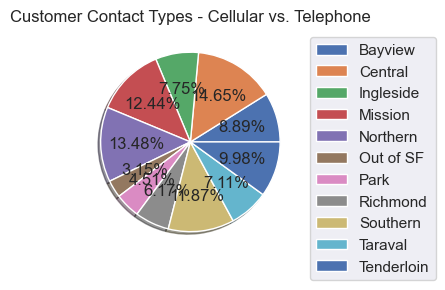

In [44]:
# Let's visualize the contact information by using the pie plot to see how they are distributed

df_grouped = current_clean_df.groupby(['police_district'])['police_district'].count().transform(lambda x: x / x.sum() * 100)
ax = df_grouped.plot(kind='pie', figsize=(10,3), 
                  grid=False, ylabel='',
                  #labels = ['cellular', 'Positive'],
                  shadow=True,# explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
                  legend=True, labeldistance=None, 
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='best')
plt.title('Customer Contact Types - Cellular vs. Telephone')
plt.tight_layout()
plt.show()

In [45]:
# Let's review if day of week would be an important attribute to use for analysis

df_grouped = current_clean_df.groupby(['incident_year','incident_day_of_week'])['incident_year'].count().transform(lambda x: round(x / x.sum() * 100,2))
df_grouped


incident_year  incident_day_of_week
2018           Friday                  2.58
               Monday                  2.42
               Saturday                2.45
               Sunday                  2.22
               Thursday                2.40
               Tuesday                 2.39
               Wednesday               2.49
2019           Friday                  2.51
               Monday                  2.35
               Saturday                2.31
               Sunday                  2.16
               Thursday                2.28
               Tuesday                 2.35
               Wednesday               2.44
2020           Friday                  1.96
               Monday                  1.85
               Saturday                1.85
               Sunday                  1.76
               Thursday                1.89
               Tuesday                 1.85
               Wednesday               1.96
2021           Friday                  2

### Inspect: Time-based Features

#### Inspect: Incidents per Day

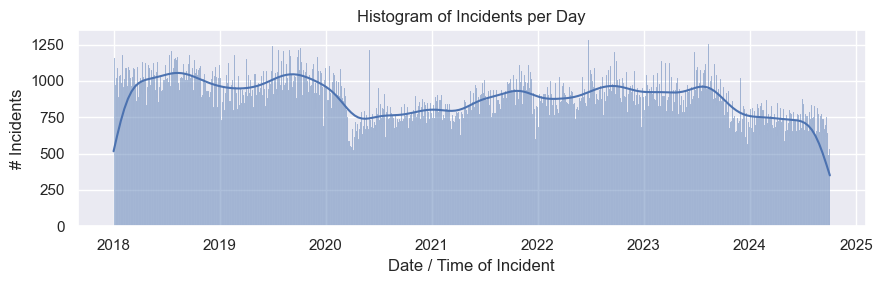

Total of 894,585 incidents from 2018-01-01 00:00:00 to 2024-10-02 21:45:00


In [48]:
plt.figure(figsize=(graph_utils.page_width, 3))
sns.histplot(data=current_clean_df, x=current_clean_df.index, bins=1000, kde=True)
# sns.histplot(data=current_clean_df, x=current_clean_df.index, discrete=True, kde=True)

plt.xlabel('Date / Time of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day')

plt.tight_layout()
plt.savefig('../images/incidents_per_day.png')
plt.show()

print(f'Total of {current_clean_df.shape[0]:,d} incidents from {current_clean_df.index.min()} to {current_clean_df.index.max()}')

#### Inspect: Incidents per Year

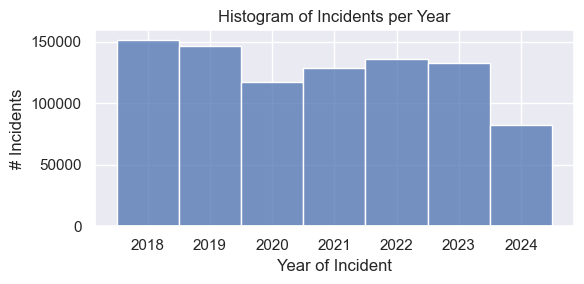

In [50]:
plt.figure(figsize=(6, 3))
# sns.histplot(data=current_clean_df, x='incident_year', kde=True)
sns.histplot(data=current_clean_df, x='incident_year', discrete=True)

plt.xlabel('Year of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Year')

plt.tight_layout()
plt.savefig('../images/incidents_per_year.png')
plt.show()

#### Inspect: Incidents by Day of Week

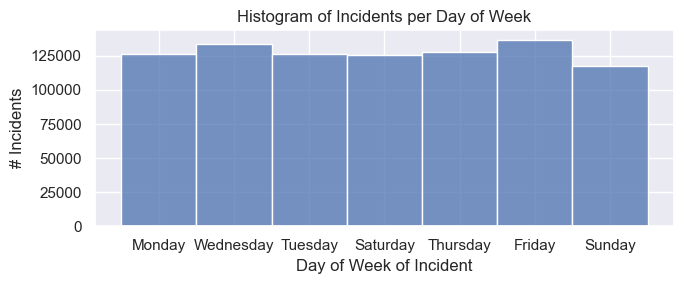

In [52]:
plt.figure(figsize=(7, 3))
# sns.histplot(data=current_clean_df, x='incident_year', kde=True)
sns.histplot(data=current_clean_df, x='incident_day_of_week')#, discreet=False)

plt.xlabel('Day of Week of Incident')
plt.ylabel('# Incidents')
plt.title('Histogram of Incidents per Day of Week')

plt.tight_layout()
plt.savefig('../images/incidents_per_DoW.png')
plt.show()

In [53]:
current_clean_df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'police_district', 'analysis_neighborhood', 'latitude', 'longitude',
       'neighborhoods', 'current_police_districts'],
      dtype='object')

### Inspect: Incident-Specific Features

Let's look at Incident-specific features that are left for a specific Incident to understand how the data is reported:
  * incident_datetime
  * report_datetime
  * row_id
  * incident_id / incident_code
  * incident_number
  * cad_number
  * incident_category
  * incident_subcategory
  * incident_description
  * resolution

Is there an interesting incident to look at with a lot of rows?

In [56]:
inc_id = current_clean_df[current_clean_df.incident_id.duplicated()].incident_id.value_counts().index[0]

In [57]:
current_raw_df.query('incident_id == @inc_id')[['incident_datetime', 'report_datetime', 'incident_id', 'incident_code', 
                                                'row_id', 'incident_number', 'cad_number',
                                                'incident_category','incident_subcategory', 'incident_description', 
                                                'resolution']]

,incident_datetime,report_datetime,incident_id,incident_code,row_id,incident_number,cad_number,incident_category,incident_subcategory,incident_description,resolution
datetime,,,,,,,,,,,
2024-02-24 05:01:00,2024/02/24 05:01:00 AM,2024/02/24 05:01:00 AM,1367361,62050,136736162050,240118629,240550489.0,Warrant,Warrant,"Warrant Arrest, Enroute To Outside Jurisdiction",Cite or Arrest Adult
2024-02-24 05:01:00,2024/02/24 05:01:00 AM,2024/02/24 05:01:00 AM,1367361,16710,136736116710,240118629,240550489.0,Drug Offense,Drug Violation,"Narcotics Paraphernalia, Possession of",Cite or Arrest Adult
2024-02-24 05:01:00,2024/02/24 05:01:00 AM,2024/02/24 05:01:00 AM,1367361,7045,136736107045,240118629,240550489.0,Recovered Vehicle,Recovered Vehicle,"Vehicle, Recovered, Truck",Cite or Arrest Adult
2024-02-24 05:01:00,2024/02/24 05:01:00 AM,2024/02/24 05:01:00 AM,1367361,16650,136736116650,240118629,240550489.0,Drug Offense,Drug Violation,Methamphetamine Offense,Cite or Arrest Adult


The single incident, multiple rows explanation is as follows (from the [DataSF Dataset Explainer](https://sfdigitalservices.gitbook.io/dataset-explainers/sfpd-incident-report-2018-to-present#multiple-incident-codes)):

>Incident reports can have one or more associated Incident Codes. For example, an officer may have a warrant for an
>arrest and while making the arrest, discovers narcotics in the individual’s possession. The officer would record
>two Incident Codes: (1) for the warrant and (2) for the discovery of narcotics.
>
>When multiple Incident Codes exist, the Incident ID, Incident Number and CAD Numbers remain the same and the
>Row ID field can be used as a unique identifier for each row of data. An example is provided below.

Since we are interested in predicting the `incident_category` based on time and location, we'll retain  all three rows, each with a different category, but remove the columns that merge them into a single incident. This gives us more training data with a whetted outcome, i.e. target variable.

So we will drop the following columns:

  * incident_datetime / report_datetime
  * incident_id / incident_code / row_id / incident_number / cad_number
  * incident_subcategory
  * incident_description

and only retain `incident_category` as our target variable - we will look at `resolution` separately.

In [59]:
drop_cols_incident = ['incident_datetime', 'report_datetime', 
                      'incident_id', 'incident_code', 'row_id', 'incident_number', 'cad_number',
                      'incident_subcategory', 'incident_description'
                     ]

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_incident)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column incident_datetime dropped
... preprocess_drop_cols: Column report_datetime dropped
... preprocess_drop_cols: Column incident_id dropped
... preprocess_drop_cols: Column incident_code dropped
... preprocess_drop_cols: Column row_id dropped
... preprocess_drop_cols: Column incident_number dropped
... preprocess_drop_cols: Column cad_number dropped
... preprocess_drop_cols: Column incident_subcategory dropped
... preprocess_drop_cols: Column incident_description dropped
... Done


#### Inspect: Resolution

In [61]:
current_clean_df.resolution.value_counts()

resolution
Open or Active          717515
Cite or Arrest Adult    170119
Unfounded                 4474
Exceptional Adult         2477
Name: count, dtype: int64

Both the `Unfounded` and `Exceptional Adult` resolution types will dismiss the case so we can remove these rows.

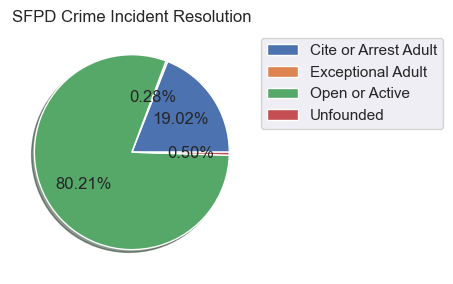

In [63]:
df_grouped = current_clean_df.groupby(['resolution'])['resolution'].count().transform(lambda x: x / x.sum() * 100)
ax = df_grouped.plot(kind='pie', figsize=(10,3), #startangle=20, 
                  grid=False, ylabel='',
                  #labels = ['Yes', 'No', 'Unknown'],
                  shadow=True, #explode=[0.2, 0.2, 0.2],
                  legend=True, labeldistance=None, 
                  autopct='%1.2f%%')
ax.legend(bbox_to_anchor=(1, 1),loc='best')
plt.title('SFPD Crime Incident Resolution')
plt.tight_layout()
plt.show()


In [64]:
current_clean_df = current_clean_df.query('resolution != "Unfounded" and resolution != "Exceptional Adult"')

In [65]:
current_clean_df.resolution.value_counts()

resolution
Open or Active          717515
Cite or Arrest Adult    170119
Name: count, dtype: int64

In [66]:
# graph_utils.graph_features(current_clean_df, 13, 2, figsize=(10, 15))

#### Inspect: Police Districts

In [68]:
current_clean_df.police_district.value_counts()

police_district
Central       130415
Northern      120046
Mission       110489
Southern      104933
Tenderloin     88689
Bayview        78850
Ingleside      68741
Taraval        63206
Richmond       54714
Park           40037
Out of SF      27514
Name: count, dtype: int64

In [69]:
current_clean_df.current_police_districts.value_counts()

current_police_districts
6.0     124469
4.0     119912
3.0     108639
1.0     104942
5.0      83278
2.0      79330
9.0      66708
10.0     64826
8.0      47929
7.0      37614
Name: count, dtype: int64

We can safely drop the `current_police_districts` column as it's not very useful, we can use `police_district` 
as a categorical feature instead. However, we need to remove the incidents that are `Out of SF`.

In [71]:
current_clean_df = current_clean_df.query('police_district != "Out of SF"')

In [72]:
current_clean_df.police_district.value_counts()

police_district
Central       130415
Northern      120046
Mission       110489
Southern      104933
Tenderloin     88689
Bayview        78850
Ingleside      68741
Taraval        63206
Richmond       54714
Park           40037
Name: count, dtype: int64

In [73]:
drop_cols_pd = ['current_police_districts']

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_pd)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column current_police_districts dropped
... Done


Now that we have fewer features, I will now rename the incident-specific columns to make it easier to understand our features:

In [75]:
current_clean_df = current_clean_df.rename(columns={'incident_date':'date',
                                                    'incident_time':'time',
                                                    'incident_year':'year',
                                                    'incident_day_of_week':'day_of_week',
                                                    'incident_category':'category'
                                                   })

In [76]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


date                     100.00
time                     100.00
year                     100.00
day_of_week              100.00
category                  99.90
resolution               100.00
police_district          100.00
analysis_neighborhood     96.52
latitude                  96.54
longitude                 96.54
neighborhoods             94.62
dtype: float64

#### Inspect: Neighborhoods

Similar to the police disctricts, we have two redundant columns `neighborhoods` and `analysis_neighborhood`:

In [79]:
current_clean_df.analysis_neighborhood.value_counts()

analysis_neighborhood
Mission                           89308
Tenderloin                        88273
South of Market                   68188
Financial District/South Beach    64833
Bayview Hunters Point             55484
North Beach                       27649
Western Addition                  27360
Sunset/Parkside                   25084
Nob Hill                          24259
Castro/Upper Market               23828
Marina                            23324
Hayes Valley                      22931
Russian Hill                      19887
Outer Richmond                    18855
West of Twin Peaks                17092
Bernal Heights                    16309
Pacific Heights                   15034
Excelsior                         14690
Chinatown                         14470
Potrero Hill                      13914
Haight Ashbury                    13587
Mission Bay                       12792
Outer Mission                     12168
Lakeshore                         11023
Inner Sunset      

In [80]:
current_clean_df.neighborhoods.value_counts()

neighborhoods
32.0    80662
53.0    66934
20.0    55731
19.0    28495
21.0    26626
        ...  
68.0      410
63.0      394
69.0      307
7.0       226
70.0      182
Name: count, Length: 116, dtype: int64

We will drop the `neighborhoods` column and re-use it's name for the `analysis_neighborhood` column:

In [82]:
drop_cols_neighborhoods = ['neighborhoods']

current_clean_df = data_utils.preprocess_data(current_clean_df, drop_cols_neighborhoods)

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column neighborhoods dropped
... Done


In [83]:
current_clean_df.rename(columns={'analysis_neighborhood':'neighborhood'}, inplace=True)

### Inspect: Target Variable - Category

Let's take a look at our target variable `category` to get an understanding of the relationships with the other features.

#### Categories: Histogram

In [87]:
current_clean_df.columns

Index(['date', 'time', 'year', 'day_of_week', 'category', 'resolution',
       'police_district', 'neighborhood', 'latitude', 'longitude'],
      dtype='object')

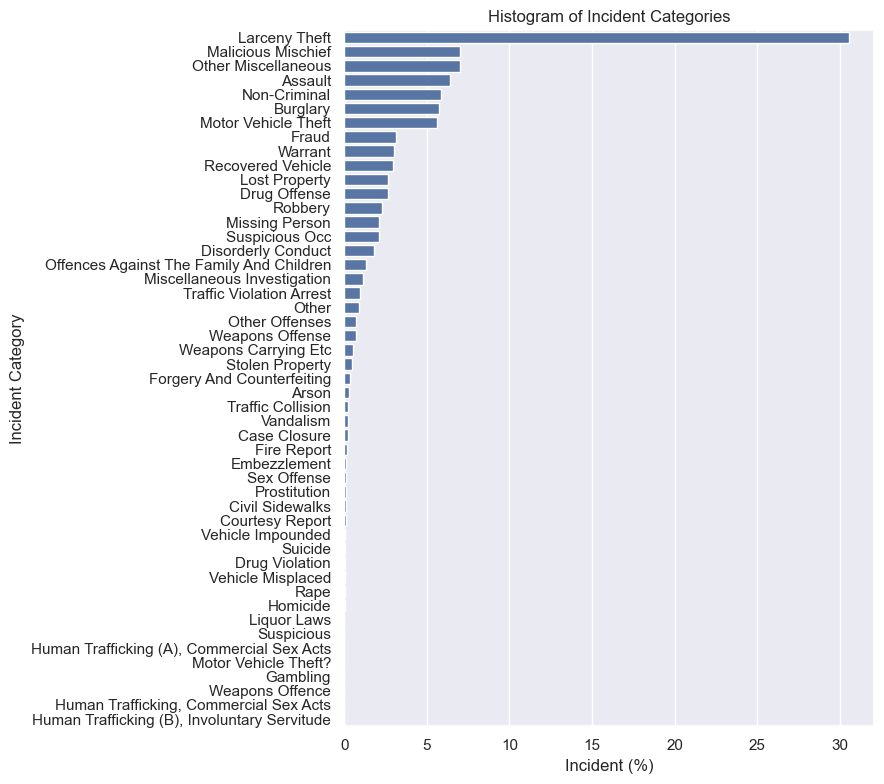

In [88]:
plt.figure(figsize=(graph_utils.page_width, 8))

cats = current_clean_df.category.value_counts()
sns.barplot(cats.transform(lambda x: (x / cats.values.sum()) * 100), orient='h')

plt.xlabel('Incident (%)')
plt.ylabel('Incident Category')
plt.title('Histogram of Incident Categories')

plt.tight_layout()
plt.savefig('../images/incidents_per_day.png')
plt.show()


#### Inspect: Categories Unique Values

In [90]:
print(f'Total of {cats.shape[0]:,d} categories:')

# cats.head(top_n)
cats.sort_index()

Total of 49 categories:


category
Arson                                             2558
Assault                                          54941
Burglary                                         49569
Case Closure                                      1850
Civil Sidewalks                                    888
Courtesy Report                                    771
Disorderly Conduct                               15300
Drug Offense                                     22751
Drug Violation                                     286
Embezzlement                                      1055
Fire Report                                       1313
Forgery And Counterfeiting                        2790
Fraud                                            27038
Gambling                                            46
Homicide                                           159
Human Trafficking (A), Commercial Sex Acts          95
Human Trafficking (B), Involuntary Servitude         2
Human Trafficking, Commercial Sex Acts              23
L

Looking at the `category` distribution, we notice the following categories:

* `Human Trafficking (A), Commercial Sex Acts` (10 occurences) and `Human Trafficking, Commercial Sex Acts` (3 occurences): Since they are so few, we'll comnine them into a single `Human Trafficking (Combined)` class
* `Motor Vehicle Theft` (4,900 occurences) and `Motor Vehicle Theft?` (8 occurences) are similar enough that I converted them into the dominant class
* `Weapons Offense` (619 occurennces) `Weapons Offence` (4 occurences) look like an entry error, so they were converted to the dominant class

In [92]:
_ = data_utils.fix_data_artifacts(current_clean_df)

Fixing data artifacts (in-place) ... 
... Category column:
    ..."Human Trafficking*"
    ..."Motor Vehicle Theft"
    ..."Weapons Offence"
Done


In [93]:
current_clean_df.category.value_counts()

category
Larceny Theft                               262495
Malicious Mischief                           60182
Other Miscellaneous                          59990
Assault                                      54941
Non-Criminal                                 50102
Burglary                                     49569
Motor Vehicle Theft                          48516
Fraud                                        27038
Warrant                                      25839
Recovered Vehicle                            25188
Lost Property                                22756
Drug Offense                                 22751
Robbery                                      19824
Missing Person                               18347
Suspicious Occ                               17900
Disorderly Conduct                           15300
Offences Against The Family And Children     11534
Miscellaneous Investigation                   9881
Traffic Violation Arrest                      8235
Other                 

#### Categories: By Year

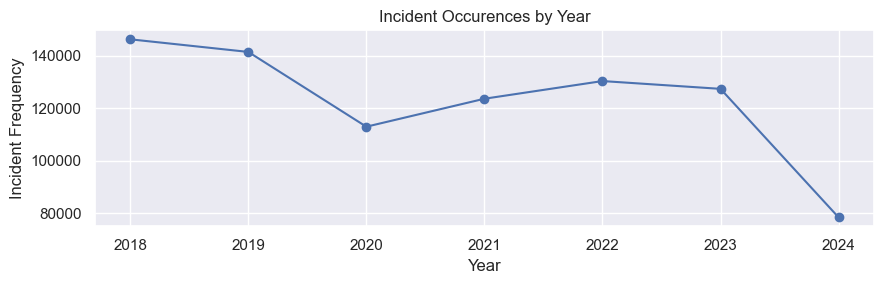

In [95]:
plt.figure(figsize=(graph_utils.page_width, 3))

current_clean_df.year.value_counts().sort_index().plot(marker='o')

plt.xlabel('Year')
plt.ylabel('Incident Frequency')
plt.title('Incident Occurences by Year')

plt.tight_layout()
plt.savefig('../images/incidents_per_year.png')
plt.show()

#### Categories - Top 10: By Year

In [97]:
top_n = 10
top_cats = cats.index[0:top_n]

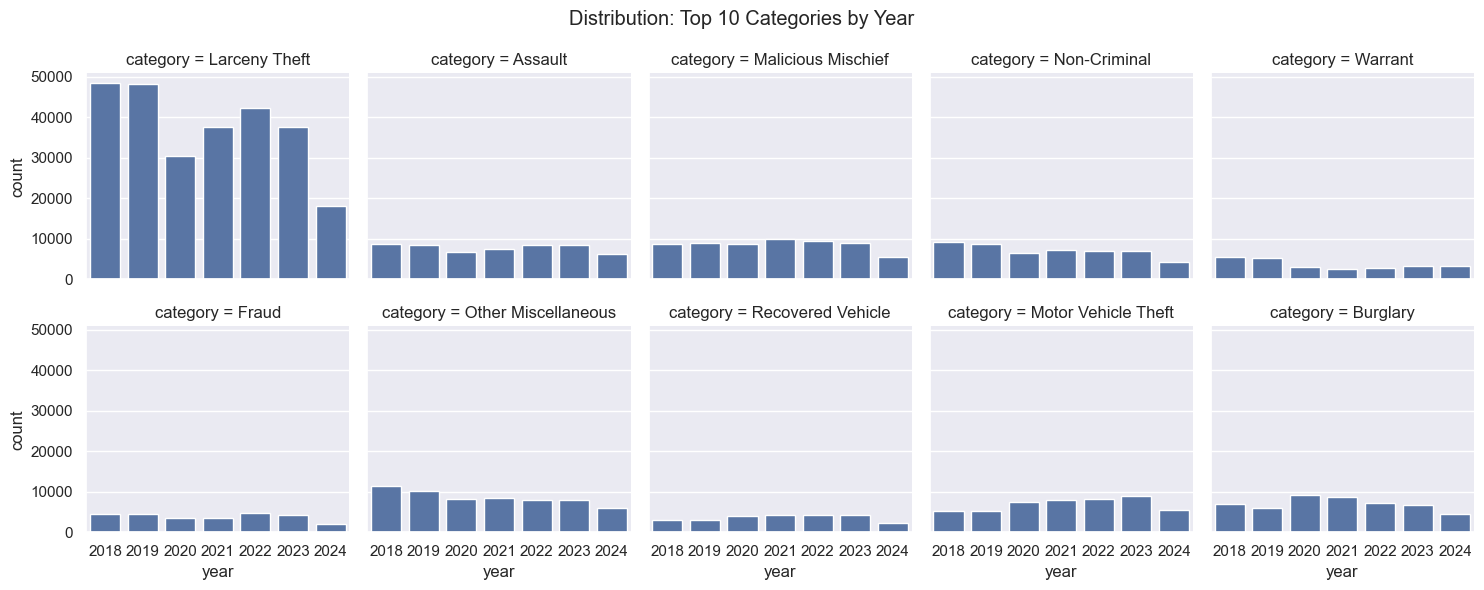

In [98]:
g = sns.FacetGrid(current_clean_df[['category', 'year']].query('category in @top_cats'), 
                  col='category', col_wrap=5)
g = g.map(sns.countplot, 'year', order=np.sort(current_clean_df['year'].unique()))
# g.set_xticklabels(rotation=30)

plt.suptitle(f'Distribution: Top {top_n} Categories by Year')
plt.ylabel('Incidents / Year')
plt.tight_layout()
plt.savefig('../images/incidents_top_n_by_year.png')

plt.show()

#### Categories: By Police Disctrict

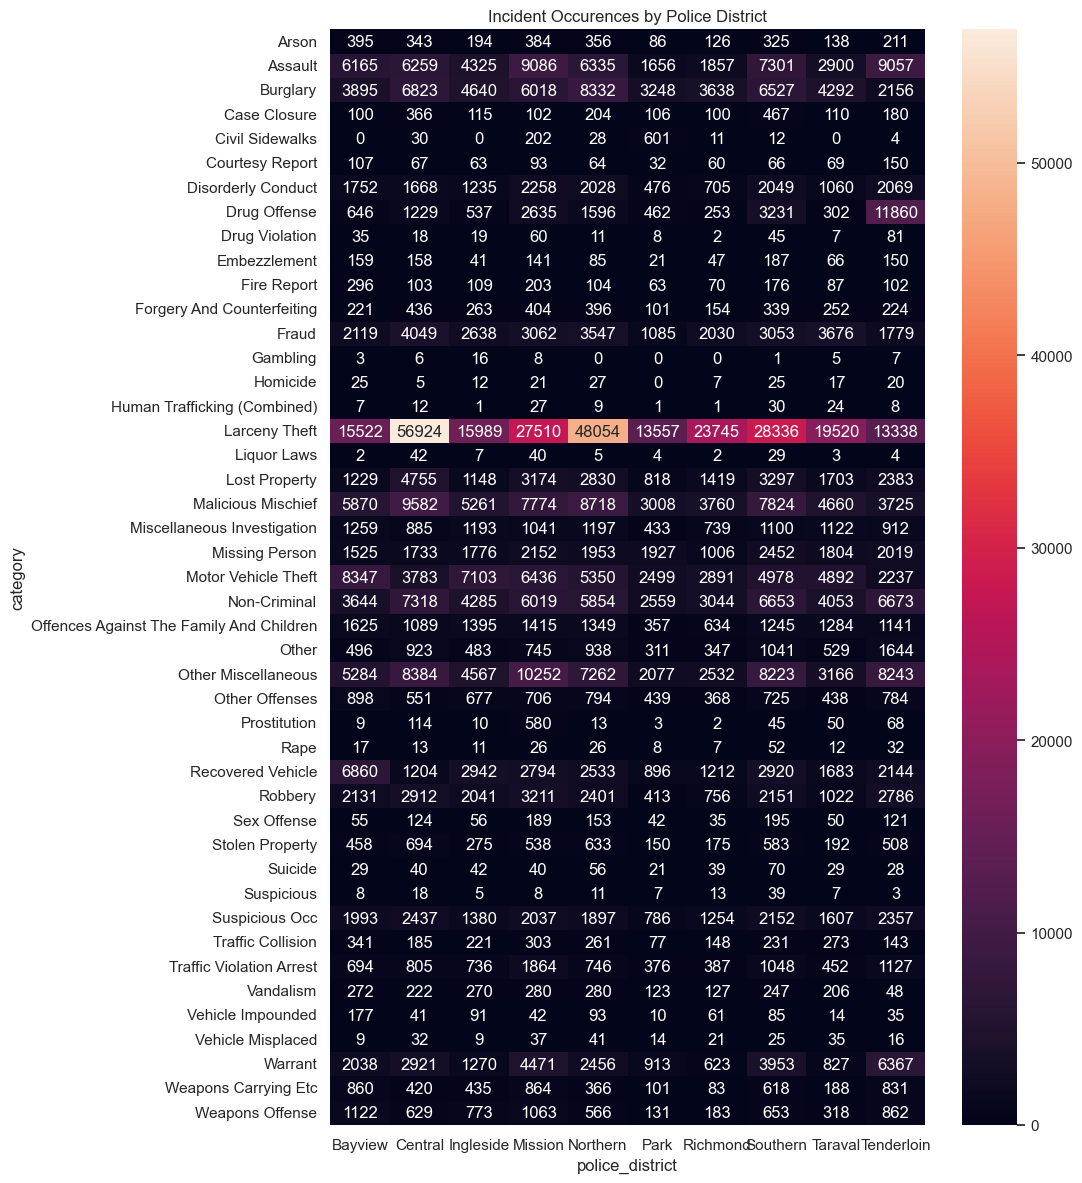

In [100]:
heatmap_data = pd.crosstab(current_clean_df['category'], current_clean_df['police_district'])

plt.figure(figsize=(graph_utils.page_width+2, 12))

sns.heatmap(heatmap_data, annot=True, fmt='d')

# plt.xlabel('Police District')
# plt.ylabel('Category')
plt.title('Incident Occurences by Police District')

plt.tight_layout()
plt.savefig('../images/incidents_per_district_heatmap.png')
plt.show()

### Drop Nulls

We have now gotten rid of most of the unwanted data and most of the columns have above 94% non-null data. This is sufficient data for training, so we will drop all null rows for now:

In [103]:
current_clean_df.dropna(inplace=True)

In [104]:
print('COMPLETENESS CHECK: Percent non-null values in each column')
current_clean_df.isnull().sum().transform(lambda x: (1 - (x / current_clean_df.shape[0])) * 100).round(2)

COMPLETENESS CHECK: Percent non-null values in each column


date               100.0
time               100.0
year               100.0
day_of_week        100.0
category           100.0
resolution         100.0
police_district    100.0
neighborhood       100.0
latitude           100.0
longitude          100.0
dtype: float64

In [105]:
current_clean_df.head(2)

,date,time,year,day_of_week,category,resolution,police_district,neighborhood,latitude,longitude
datetime,,,,,,,,,,
2023-03-11 14:00:00,2023/03/11,14:00,2023,Saturday,Assault,Open or Active,Park,Golden Gate Park,37.772895,-122.454285
2022-06-27 12:00:00,2022/06/27,12:00,2022,Monday,Lost Property,Open or Active,Central,Financial District/South Beach,37.787359,-122.408227


## Cross-check Preprocessing

Read in the preprocessed data from utility function and validate against the currently _cleaned_ data 
as part of the data investigation

In [108]:
temp = data_utils.preprocess_data(current_raw_df.copy())

crosscheck = 'PASSED' if (temp.shape[0] == current_clean_df.shape[0]
                          and temp.shape[1] == current_clean_df.shape[1]) else 'FAILED'
print('\n\nCROSSCHECK {}: raw: {} -> pre-processed: {} == cleaned: {}\n\n'
      .format(crosscheck, current_raw_df.shape, temp.shape, current_clean_df.shape))

Pre-processing ... 
... Dropping unwanted columns ... 
... preprocess_drop_cols: Column Unnamed: 0 not dropped: KeyError("['Unnamed: 0'] not found in axis")
... preprocess_drop_cols: Column esncag_-_boundary_file dropped
... preprocess_drop_cols: Column central_market/tenderloin_boundary_polygon_-_updated dropped
... preprocess_drop_cols: Column civic_center_harm_reduction_project_boundary dropped
... preprocess_drop_cols: Column hsoc_zones_as_of_2018-06-05 dropped
... preprocess_drop_cols: Column invest_in_neighborhoods_(iin)_areas dropped
... preprocess_drop_cols: Column report_type_code dropped
... preprocess_drop_cols: Column report_type_description dropped
... preprocess_drop_cols: Column filed_online dropped
... preprocess_drop_cols: Column intersection dropped
... preprocess_drop_cols: Column cnn dropped
... preprocess_drop_cols: Column point dropped
... preprocess_drop_cols: Column supervisor_district dropped
... preprocess_drop_cols: Column supervisor_district_2012 dropped
...

In [109]:
# for col in zip(temp.columns, current_clean_df.columns):
#     print (col)

We're ready for modeling now!